2016250027 parkchanho
#################################################
Linear regression using the Normal Equation



Saving figure generated_data_plot


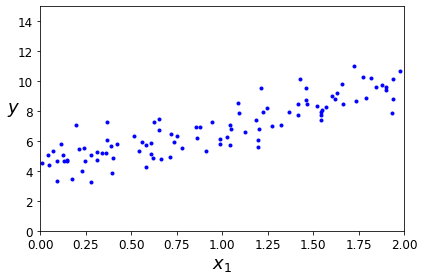



### Linear regression using the Normal Equation ###

 theta_best :  [[4.21509616]
 [2.77011339]]

 y_predict : 
[[4.21509616]
 [9.75532293]]


Saving figure predicted_plot


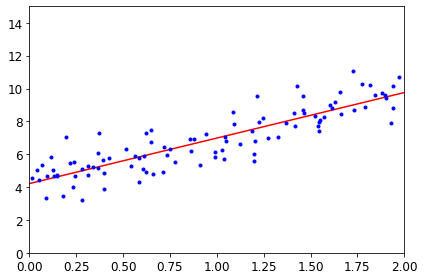


 [lin_reg.intercept_, lin_reg.coef_] : 
[4.21509616] [[2.77011339]]

 [lin_reg.predict(X_new)] :  [[4.21509616]
 [9.75532293]]


### Linear regression using batch gradient descent ###

 theta:  [[4.21509616]
 [2.77011339]]

 X_new_b.dot(theta) :  [[4.21509616]
 [9.75532293]]


Saving figure gradient_descent_plot


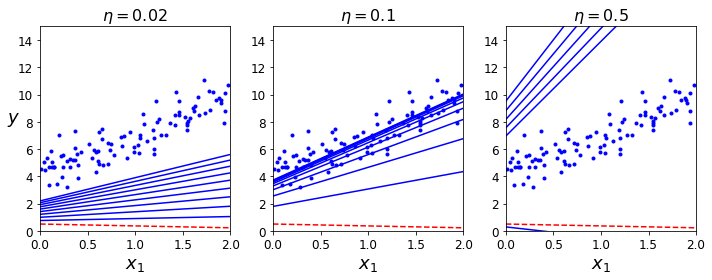



### Stochastic Gradient Descent ###


Saving figure sgd_plot


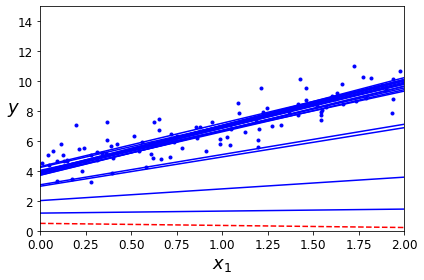


 theta :  [[4.21076011]
 [2.74856079]]

 [sgd_reg.intercept_, sgd_reg.coef]_ :
[4.24365286] [2.8250878]


### Mini-batch gradient descent ###

 theta :  [[4.25214635]
 [2.7896408 ]]


Saving figure gradient_descent_paths_plot


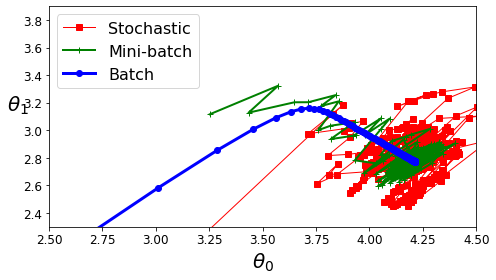

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print("2016250027 parkchanho")
print("#################################################")
print("Linear regression using the Normal Equation\n")

import numpy as np
#sample data
X = 2 * np.random.rand(100, 1) # 0~2 사이 100개 고르게
y = 4 + 3 * X + np.random.randn(100, 1) #random 표준 분포난수

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
print("\n")
save_fig("generated_data_plot")
plt.show()

print("\n\n### Linear regression using the Normal Equation ###")

X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print('\n', "theta_best : ", theta_best)

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

print('\n', "y_predict : ")
print(y_predict)

plt.plot(X_new, y_predict, "r-") # draws the red line
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
print("\n")
save_fig("predicted_plot")
plt.show()

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print('\n', "[lin_reg.intercept_, lin_reg.coef_] : ")
print(lin_reg.intercept_, lin_reg.coef_)
print('\n', '[lin_reg.predict(X_new)] : ', lin_reg.predict(X_new))

print("\n\n### Linear regression using batch gradient descent ###")

eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print('\n', 'theta: ', theta)

print('\n', 'X_new_b.dot(theta) : ', X_new_b.dot(theta))

theta_path_bgd = []
def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta = np.random.randn(2,1) # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

print("\n")
save_fig("gradient_descent_plot")
plt.show()

print("\n\n### Stochastic Gradient Descent ###")

theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20: # not shown in the book
            y_predict = X_new_b.dot(theta) # not shown
            style = "b-" if i > 0 else "r--" # not shown
            plt.plot(X_new, y_predict, style) # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta) # not shown

plt.plot(X, y, "b.") # not shown
plt.xlabel("$x_1$", fontsize=18) # not shown
plt.ylabel("$y$", rotation=0, fontsize=18) # not shown
plt.axis([0, 2, 0, 15]) # not shown
print("\n")
save_fig("sgd_plot") # not shown
plt.show() # not shown

print('\n', 'theta : ', theta)

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

print('\n', '[sgd_reg.intercept_, sgd_reg.coef]_ :')
print(sgd_reg.intercept_, sgd_reg.coef_)

print("\n\n### Mini-batch gradient descent ###")

theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1) # random initialization

t0, t1 = 10, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

print('\n', 'theta : ', theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$ ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
print("\n")
save_fig("gradient_descent_paths_plot")
plt.show()



Saving figure generated_data_plot


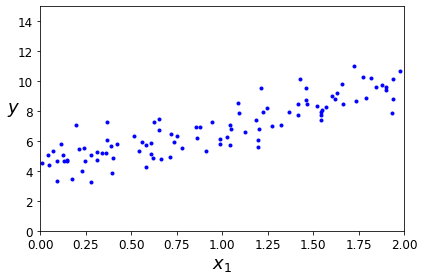

In [2]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
print("\n")
save_fig("generated_data_plot")
plt.show()

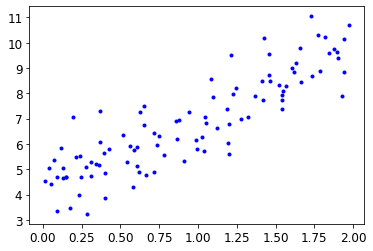

In [4]:
plt.plot(X, y, "b.") # x, y 축 그래프를 그린다
plt.show()

In [7]:
print('\n', "theta_best : ", theta_best)


 theta_best :  [[4.21509616]
 [2.77011339]]


In [8]:
X_new = np.array([[0], [2]])
print(X_new)

[[0]
 [2]]


In [9]:
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[4.21509616]
 [9.75532293]]


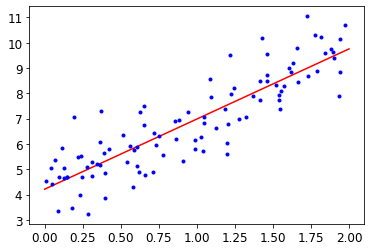

In [10]:
plt.plot(X_new, y_predict, "r-") # draws the red line
plt.plot(X, y, "b.")
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression #선형회귀
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print('\n', "[lin_reg.intercept_, lin_reg.coef_] : ")
print(lin_reg.intercept_, lin_reg.coef_)
print('\n', '[lin_reg.predict(X_new)] : ', lin_reg.predict(X_new))


 [lin_reg.intercept_, lin_reg.coef_] : 
[4.21509616] [[2.77011339]]

 [lin_reg.predict(X_new)] :  [[4.21509616]
 [9.75532293]]


In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg)

LinearRegression()


AttributeError: 'numpy.ndarray' object has no attribute 'append'

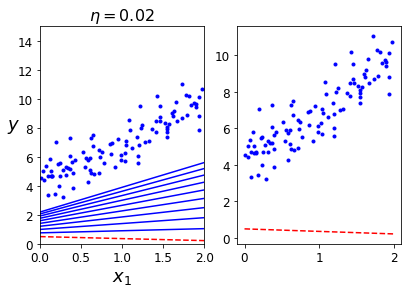

In [14]:
eta = 0.1 #학습률
n_iterations = 1000 #반복회수
m = 100
theta = np.random.randn(2,1) # 랜덤 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta = np.random.randn(2,1) # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)


 [lin_reg.intercept_, lin_reg.coef_] : 
[4.21509616] [[2.77011339]]

 [lin_reg.predict(X_new)] :  [[4.21509616]
 [9.75532293]]


### Linear regression using batch gradient descent ###


AttributeError: 'numpy.ndarray' object has no attribute 'append'

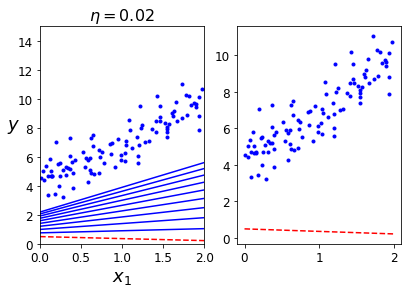

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y) #fit 은 학습을 위해서
print('\n', "[lin_reg.intercept_, lin_reg.coef_] : ")
print(lin_reg.intercept_, lin_reg.coef_) #intercept = y축을 가르지르는 값 coef = 계수
print('\n', '[lin_reg.predict(X_new)] : ', lin_reg.predict(X_new)) #predict는 학습된 모델 예측

print("\n\n### Linear regression using batch gradient descent ###")
eta = 0.1 #학습률
n_iterations = 1000 #반복회수
m = 100
theta = np.random.randn(2,1) # 랜덤 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta = np.random.randn(2,1) # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)